### 확률분포란?
* 어떤 사건이 일어날 확률을 정리한 "표" 또는 "함수"
* 예: 앞면(1) 50%, 뒷면(0) 50%
* 이산 vs 연속: 셀 수 있으면 이산, 셀 수 없으면 연속

### 베르누이 분포
* 성공/실패, 참/거짓 같은 **두 가지 결과**만 있을 때 사용
* 예: 광고 클릭 여부, 제품 불량 여부
* 매개변수: p(성공확률)
* PMF: P(X=1) = p, p(X=0) = 1-p
    * 일어날(1) 확률이 p라면 일어나지 않을(0) 확률은 1-p

### 이항분포
* 베르누이 시행을 n번 반복했을 때 성공 횟수
* 예: 100명에게 이메일을 보냈을 때 몇 명이나 열까?
* 매개변수: n(시행횟수), p(각 시행의 성공 확률)
* PMF: $P(X=k) = C(n,k) × p^k × (1-p)^{n-k}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import matplotlib as mpl

# 한글 폰트 설정 (선택사항)
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 베르누이 분포 시뮬레이션
print("=== 베르누이 분포 ===")
# 광고 클릭률이 20%인 경우
p = 0.2
bernoulli_dist = stats.bernoulli(p)

# 10번의 시행 시뮬레이션
trials = bernoulli_dist.rvs(size=10)
print(f"10번 시행 결과: {trials}")
print(f"클릭 횟수: {sum(trials)}")

=== 베르누이 분포 ===
10번 시행 결과: [0 0 0 0 0 1 0 0 1 1]
클릭 횟수: 3



=== 이항분포 ===


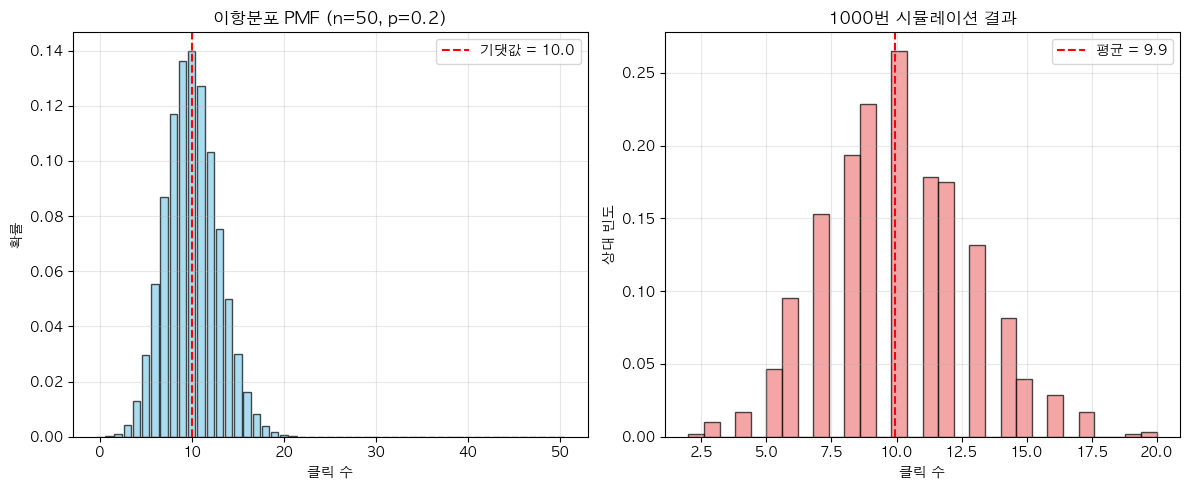

In [3]:
# 2. 이항분포 시각화
print("\n=== 이항분포 ===")
n = 50  # 50명에게 광고 노출
p = 0.2  # 클릭률 20%

binomial_dist = stats.binom(n, p)

# x축: 가능한 클릭 수 (0~50)
x = np.arange(0, n+1)
# y축: 각 클릭 수의 확률
pmf = binomial_dist.pmf(x)

plt.figure(figsize=(12, 5))

# 왼쪽: PMF
plt.subplot(1, 2, 1)
plt.bar(x, pmf, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(n*p, color='red', linestyle='--', label=f'기댓값 = {n*p}')
plt.xlabel('클릭 수')
plt.ylabel('확률')
plt.title(f'이항분포 PMF (n={n}, p={p})')
plt.legend()
plt.grid(alpha=0.3)

# 오른쪽: 시뮬레이션
plt.subplot(1, 2, 2)
simulations = binomial_dist.rvs(size=1000)
plt.hist(simulations, bins=30, alpha=0.7, color='lightcoral', edgecolor='black', density=True)
plt.xlabel('클릭 수')
plt.ylabel('상대 빈도')
plt.title('1000번 시뮬레이션 결과')
plt.axvline(np.mean(simulations), color='red', linestyle='--', label=f'평균 = {np.mean(simulations):.1f}')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
# 3. 실전 예제: A/B 테스트
print("\n=== 실전: A/B 테스트 ===")
# A안: 전환율 15%, B안: 전환율 18%
# 각각 100명씩 테스트

conversions_A = stats.binom(100, 0.15).rvs()
conversions_B = stats.binom(100, 0.18).rvs()

print(f"A안 전환 수: {conversions_A}개")
print(f"B안 전환 수: {conversions_B}개")
print(f"B안이 {conversions_B - conversions_A}명 더 많이 전환!")


=== 실전: A/B 테스트 ===
A안 전환 수: 22개
B안 전환 수: 21개
B안이 -1명 더 많이 전환!


### 연습문제
1. **문제 1**: 불량률이 5%인 공장에서 제품 20개를 검사할 때, 불량품이 2개 이상 나올 확률은?
2. **문제 2**: 이메일 오픈률이 25%일 때, 200명에게 보내면 평균 몇 명이 열까? 표준편차는?
3. **문제 3**: 주사위를 30번 던질 때, 6이 정확히 5번 나올 확률을 계산하고 시뮬레이션으로 검증해보세요.

In [5]:
# 문제 1

# 불량률 5%
p = 0.05

# 제품 20개
n = 20

# 20개를 검사
binomial_dist = stats.binom(n, p)

# 전체 확률에서 불량품이 0개 나올 확률과 불량품이 1개 나올 확률을 제거
print(1 - (binomial_dist.pmf(0) + binomial_dist.pmf(1)))

0.26416047505615015


In [6]:
# 문제 2

# 이메일 오픈률 25%
p = 0.25

# 인원 200명
n = 200

mean = n * p
std_dev = np.sqrt(n * p * (1 - p))

# 200명에게 전송
print(f"평균: {mean}")
print(f"표준편차: {std_dev}")

평균: 50.0
표준편차: 6.123724356957945


6이 5번 나올 확률: 0.192


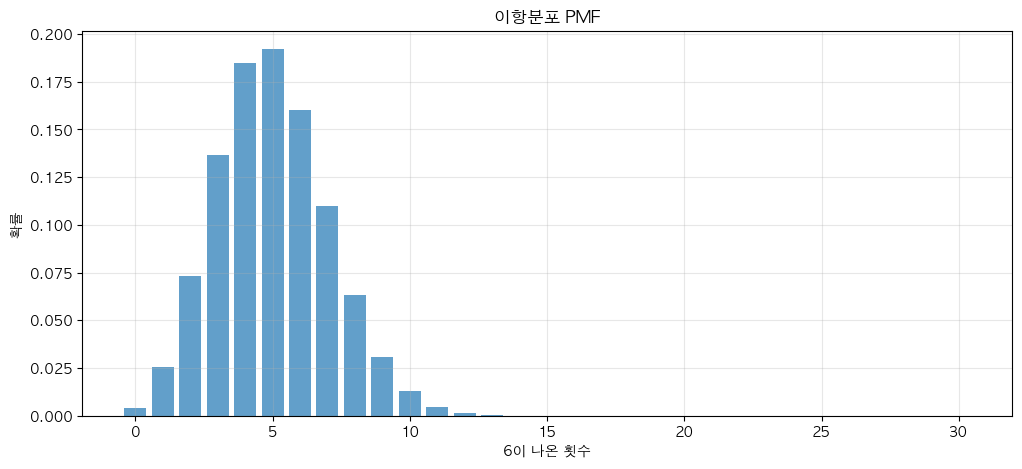

In [17]:
# 문제 3

# 시행횟수
n = 30

# 확률
p = 1/6

# 이항 분포 계산
binomial_dist = stats.binom(n, p)

# 6이 오직 5번 나올 확률
answer = binomial_dist.pmf(5)
print(f"6이 5번 나올 확률: {answer:.3f}")

x = np.arange(0, n+1)
pmf = binomial_dist.pmf(x)

plt.figure(figsize=(12,5))
plt.bar(x, pmf, alpha=0.7)
plt.xlabel('6이 나온 횟수')
plt.ylabel('확률')
plt.title('이항분포 PMF')
plt.grid(alpha=0.3)
plt.show()